In [ ]:
#The first step in this task is installation of necessary libraries. These libraries performs different functions and are imported into Jupyter notebook. They include:
#Geopandas is a library that handles geospatial data 
#Pandas and Numpy  helps to convert file into dataframe and makes it easier to modify data.
#Folium helps the visualization of data through interactive maps
#Seaborn, Matplotlib and plotly are responsible for the visualization of data.

In [139]:
#Install necessary libraries needed to import data, read data and visualize data
#import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import pathlib
from matplotlib import style
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import plotly.express as px


In [3]:
# Read the CSV file  for life expectancy and skips the first 4 rows
lexp = pd.read_csv(r"C:\Users\Mbetini\Downloads\Data-20211220\API_SP.DYN.LE00.MA.IN_DS2_en_csv_v2_2825277.csv", skiprows=4)

In [92]:
#This function displays the first five rows of the life expectancy data.
lexp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,64.084000,64.429000,64.747000,65.053000,65.356000,65.660000,...,72.792000,72.930000,73.069000,73.208000,73.348000,73.488000,73.628000,73.768000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,41.177958,41.618931,42.049027,42.466545,42.871793,43.266739,...,58.187327,58.907374,59.560016,60.139422,60.643170,61.083445,61.470354,61.813155,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,31.718000,32.224000,32.724000,33.216000,33.700000,34.180000,...,60.675000,61.133000,61.563000,61.965000,62.343000,62.701000,63.047000,63.382000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,36.043028,36.469825,36.890425,37.302945,37.706825,38.104684,...,54.149592,54.614796,55.067740,55.505205,55.921324,56.311912,56.674964,57.012163,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,36.305000,36.582000,36.874000,37.181000,37.501000,37.833000,...,54.660000,55.447000,56.140000,56.737000,57.242000,57.677000,58.064000,58.416000,NaN,NaN


In [93]:
#display information to life expectancy information to aid data cleaning
lexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            237 non-null    float64
 5   1961            238 non-null    float64
 6   1962            238 non-null    float64
 7   1963            237 non-null    float64
 8   1964            237 non-null    float64
 9   1965            238 non-null    float64
 10  1966            238 non-null    float64
 11  1967            238 non-null    float64
 12  1968            238 non-null    float64
 13  1969            238 non-null    float64
 14  1970            239 non-null    float64
 15  1971            238 non-null    float64
 16  1972            238 non-null    float64
 17  1973            239 non-null    flo

In [5]:
#data cleaning 
# Replace missing values using mean
lex=lexp.fillna(lexp.mean())
# drop columns with null values
le= lex.dropna(how='all', axis=1)
le.head()
#Views the first 5 rows after cleaning
lex.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,64.084000,64.429000,64.747000,65.053000,65.356000,65.660000,...,72.792000,72.930000,73.069000,73.208000,73.348000,73.488000,73.628000,73.768000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,41.177958,41.618931,42.049027,42.466545,42.871793,43.266739,...,58.187327,58.907374,59.560016,60.139422,60.643170,61.083445,61.470354,61.813155,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,31.718000,32.224000,32.724000,33.216000,33.700000,34.180000,...,60.675000,61.133000,61.563000,61.965000,62.343000,62.701000,63.047000,63.382000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,36.043028,36.469825,36.890425,37.302945,37.706825,38.104684,...,54.149592,54.614796,55.067740,55.505205,55.921324,56.311912,56.674964,57.012163,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,36.305000,36.582000,36.874000,37.181000,37.501000,37.833000,...,54.660000,55.447000,56.140000,56.737000,57.242000,57.677000,58.064000,58.416000,NaN,NaN


In [6]:
#filter data for year 2000

le_2000 = le[['Country Code', '2000']]
le_2000.head()

,Country Code,2000
0,ABW,71.312000
1,AFE,49.362461
2,AFG,54.663000
3,AFW,48.184036
4,AGO,44.466000


In [7]:
#filter data for year 2010

le_2010 = le[['Country Code', '2010']]
le_2010.head()

,Country Code,2010
0,ABW,72.517000
1,AFE,56.580680
2,AFG,59.683000
3,AFW,53.179092
4,AGO,52.848000


In [98]:
#calls for established geopandas files
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
#imports the file 'naturalearth_lowres'
earth= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#prints the first 5 rows to view the imported file
print (earth.head())

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


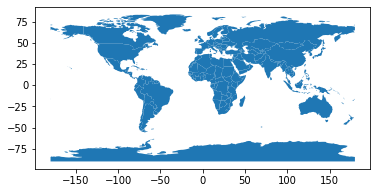

In [9]:
#plots earth data to visualize the data
earth.plot()

In [13]:
#lists all columns in earth dataframe
earth.columns

Index(['pop_est', 'continent', 'name', 'Country Code', 'gdp_md_est',
       'geometry'],
      dtype='object')

In [14]:
#renames  column iso_a3 as 'Country Code'
#The rename permits the merge of earth data with other data that has same column name ='Country Code'
earth = earth.rename(columns={'iso_a3':'Country Code'})

In [15]:
#merge earth data with life expectancy for year_2000, and the merged data is called earth_merge2000 
earth_merge2000 = earth.merge(le_2000, on= 'Country Code', how='left')

In [16]:
#merge earth data with life expectancy data for year_2010, named earth_merge2010 
earth_merge2010 = earth.merge(le_2010, on= 'Country Code', how='left')


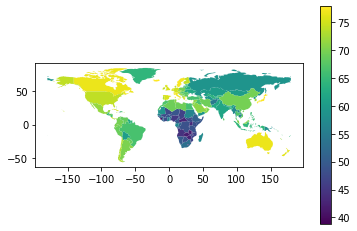

In [22]:
#plots Chloropleth map with 2000

fig, ax = plt.subplots(1, 1)
earth_merge2000.plot(column='2000', ax=ax, legend=True)

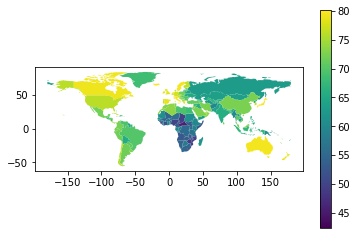

In [44]:
#Chloropleth map with life exp for 2o1o

fig, ax = plt.subplots(1, 1)
earth_merge2010.plot(column='2010', ax=ax, legend=True)

In [46]:
#TASK 1.2

In [47]:
#import population data
popu = pd.read_csv(r"C:\Users\Mbetini\Downloads\Data-20211220\API_SP.POP.TOTL_DS2_en_csv_v2_2763937.csv", skiprows=4)

In [48]:
popu.head()
popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [69]:
#data cleaning 
#filling missing values using mean and drop all null values
po =popu.fillna(popu.mean())
pop= po.dropna(how='all', axis=1)
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [70]:
#filter year 2000
pop_2000 = pop[['Country Code', '2000']]
pop_2000.head()

,Country Code,2000
0,ABW,90866.0
1,AFE,398113044.0
2,AFG,20779957.0
3,AFW,267214544.0
4,AGO,16395477.0


In [71]:
#filter year 2010
pop_2010 = pop[['Country Code', '2010']]
pop_2010.head()

,Country Code,2010
0,ABW,101665.0
1,AFE,518468229.0
2,AFG,29185511.0
3,AFW,350556886.0
4,AGO,23356247.0


In [72]:
#merge popukation_2000 with life expectancy_2000, named lepop2000
lepop200 = pop_2000.merge(le_2000, on= 'Country Code', how='left')
lepop200.head(20)

,Country Code,2000_x,2000_y
0,ABW,90866.0,71.312000
1,AFE,398113044.0,49.362461
2,AFG,20779957.0,54.663000
3,AFW,267214544.0,48.184036
4,AGO,16395477.0,44.466000
5,ALB,3089027.0,71.216000
6,AND,65390.0,64.260523
7,ARB,282344141.0,66.026259
8,ARE,3134067.0,73.516000
9,ARG,36870796.0,70.128000


In [73]:
#merge pop_2010 with le_2010, named lepop2010
lepop201 = pop_2010.merge(le_2010, on= 'Country Code', how='left')
lepop201.head(20)

,Country Code,2010_x,2010_y
0,ABW,101665.0,72.517000
1,AFE,518468229.0,56.580680
2,AFG,29185511.0,59.683000
3,AFW,350556886.0,53.179092
4,AGO,23356247.0,52.848000
5,ALB,2913021.0,74.145000
6,AND,84454.0,67.727286
7,ARB,354890097.0,68.618951
8,ARE,8549998.0,75.624000
9,ARG,40788453.0,71.837000


In [74]:
#Rename the columns for population 2000
lepop2000 = lepop200.rename(columns={'2000_x':'pop_2000','2000_y':'le_2000'})

In [75]:
#Rename the columns for population 2010
lepop2010 = lepop201.rename(columns={'2010_x':'pop_2010','2010_y':'le_2010'})

In [76]:
#merge population and life exp with earth
lepo2000 = earth.merge(lepop2000, on= 'Country Code', how='left')


In [77]:
#Earth and population 2010 merged plot
lepo2010 = earth.merge(lepop2010, on= 'Country Code', how='left')


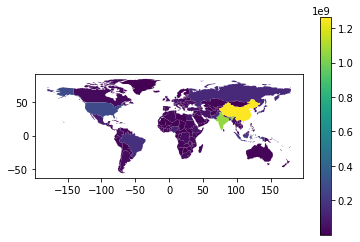

In [78]:
#choropleth Earth and population 2000 merged plot
fig, ax = plt.subplots(1, 1)
lepo2000.plot(column='pop_2000', ax=ax, legend=True)


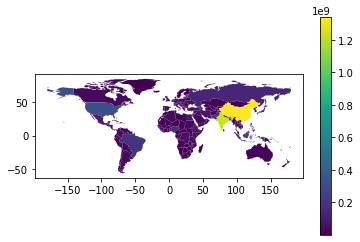

In [90]:
#Earth and population 2010 merged plot

fig, ax = plt.subplots(1, 1)
lepo2010.plot(column='pop_2010', ax=ax, legend=True)

In [91]:
#TASK 1.2For year 2005, plot the life expectancy for only the countries having population less than 138865014. Very briefly interpret the generated plot.
#filter year 2005 for life expectancy

le_2005 = le[['Country Code', '2005']]
le_2005.head()


,Country Code,2005
0,ABW,71.816000
1,AFE,52.221712
2,AFG,57.044000
3,AFW,50.333830
4,AGO,47.893000


In [92]:
#merge earth with le_2005, named earth_merge2005 
earth_merge2005 = earth.merge(le_2005, on= 'Country Code', how='left')

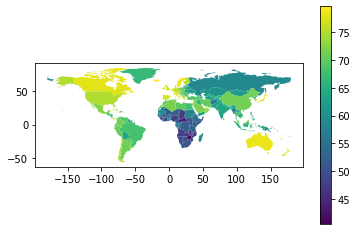

In [94]:
#Chloropleth map with life expectancy 2005
#earth_merge2005.plot(column='2005')

fig, ax = plt.subplots(1, 1)
earth_merge2005.plot(column='2005', ax=ax, legend=True)

In [95]:
#Interpretation:The population for 2005


In [96]:
#filter year 2005 for population
pop_2005 = pop[['Country Code', '2005']]
pop_2005.head()

,Country Code,2005
0,ABW,100028.0
1,AFE,453404076.0
2,AFG,25654274.0
3,AFW,305520588.0
4,AGO,19433604.0


In [101]:
#merge pop_2000 with le_2000, named lepop2000
epop200 = pop_2005.merge(le_2005, on= 'Country Code', how='left')
epop200.head(20)


,Country Code,2005_x,2005_y
0,ABW,100028.0,71.816000
1,AFE,453404076.0,52.221712
2,AFG,25654274.0,57.044000
3,AFW,305520588.0,50.333830
4,AGO,19433604.0,47.893000
5,ALB,3011487.0,72.708000
6,AND,78871.0,65.802292
7,ARB,314965776.0,67.427064
8,ARE,4588222.0,74.601000
9,ARG,38892924.0,71.008000


In [102]:
#Rename the columns
lepop2005 = epop200.rename(columns={'2005_x':'pop_2005','2005_y':'le_2005'})

In [103]:
#Earth and life expectancy 2005 merged plot

lepo2005 = earth.merge(lepop2005, on= 'Country Code', how='left')
lepo2005.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,pop_2005,le_2005
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",821606.0,64.788
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",38450323.0,52.803
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",32243753.0,77.900
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",295516599.0,75.000


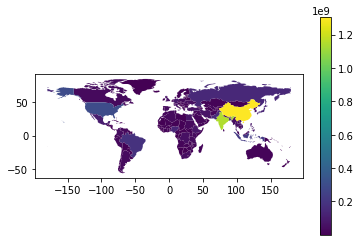

In [104]:
#Earth and population 2005 merged plot
fig, ax = plt.subplots(1, 1)
lepo2005.plot(column='pop_2005', ax=ax, legend=True)

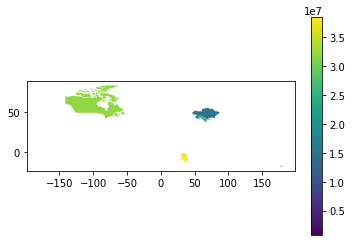

In [136]:
#Task 1.2.1: For year 2005, plot the life expectancy for only the countries having population less than 138865014. Very briefly interpret the generated plot.
#Interpretation:
#This plot shows ****#

lep1 =lepo2005[lepo2005['pop_2005'] < 138865014].head()
fig, ax = plt.subplots(1, 1)
lep1.plot(column='pop_2005', ax=ax, legend=True)

In [ ]:
#INTERPRETATION: in 2005, the life expectancy for countries with population less than 138865014 was higher than the life expectancy for countries with population 
#greater than 138865014.

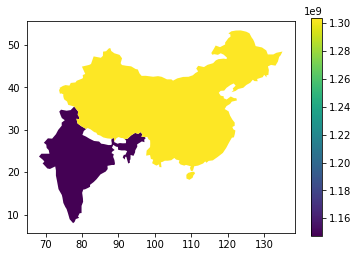

In [110]:
#Task 1.2.2
#For year 2005, plot the life expectancy for only the countries having population greater than 
295516599

#Chloropleth map
lep05 =lepo2005[lepo2005['pop_2005'] > 295516599].head()
fig, ax = plt.subplots(1, 1)
lep05.plot(column='pop_2005', ax=ax, legend=True)


In [ ]:
#INTERPRETATION: there is higher life expectancy for countries having population greater than 295516599

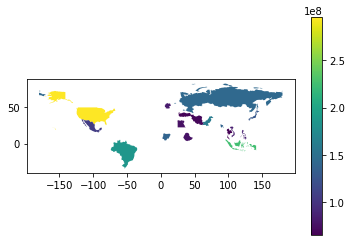

In [144]:
#Task 1.2.3
#For year 2005, plot the life expectancy for only the countries having population between 63179356 and 1147609924

lep005 = lepo2005[(lepo2005['pop_2005'] >63179356)& (lepo2005['pop_2005'] <1147609924 )]
fig, ax = plt.subplots(1, 1)
lep005.plot(column='pop_2005', ax=ax, legend=True)

#INTERPRETATION:there is higherlife expectancy for the countries having population between 63179356 and 1147609924

In [ ]:

#Task 1.2.4
#Plot the percentage change in the life expectancy from 2000 to 2010, for the country having the highest population in 2005. In this question, you must consider the life expectancy for each year between 2000 and 2010.

In [111]:
#list columns in life expectancy
le.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [112]:
#filter year 2000-2010 for life expectancy

le10 = ['Country Code', 'Country Name', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']
le100 = pd.DataFrame(pop,columns= le10)

In [113]:
le100

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ABW,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0
1,AFE,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0
2,AFG,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0
3,AFW,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0
4,AGO,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,Kosovo,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0
262,YEM,"Yemen, Rep.",17409071.0,17918369.0,18443684.0,18985001.0,19540096.0,20107416.0,20687648.0,21282514.0,21892149.0,22516464.0,23154854.0
263,ZAF,South Africa,44967713.0,45571272.0,46150913.0,46719203.0,47291610.0,47880595.0,48489464.0,49119766.0,49779472.0,50477013.0,51216967.0
264,ZMB,Zambia,10415942.0,10692197.0,10971704.0,11256740.0,11550641.0,11856244.0,12173518.0,12502958.0,12848531.0,13215142.0,13605986.0


In [114]:
le100per = le100.iloc[:,2:].pct_change()
col =['percentageChange']
per_change_sum=pd.DataFrame(le100per.sum(axis = 1),columns=col)

In [115]:
per_change_sum

,percentageChange
0,0.000000
1,50882.014493
2,-10.390937
3,122.967026
4,-10.298458
...,...
261,94.384437
262,117.664035
263,15.270297
264,-8.272035


In [140]:
l100 = ['Country Code','Country Name','2005']
percentage_change=pd.DataFrame(le,columns=l100)
percentage_change

,Country Code,Country Name,2005
0,ABW,Aruba,71.816000
1,AFE,Africa Eastern and Southern,52.221712
2,AFG,Afghanistan,57.044000
3,AFW,Africa Western and Central,50.333830
4,AGO,Angola,47.893000
...,...,...,...
261,XKX,Kosovo,66.500000
262,YEM,"Yemen, Rep.",61.947000
263,ZAF,South Africa,51.104000
264,ZMB,Zambia,46.395000


In [141]:
percentage_change_05 = percentage_change.join(per_change_sum, how = 'left')
percentage_change_05

,Country Code,Country Name,2005,percentageChange
0,ABW,Aruba,71.816000,0.000000
1,AFE,Africa Eastern and Southern,52.221712,50882.014493
2,AFG,Afghanistan,57.044000,-10.390937
3,AFW,Africa Western and Central,50.333830,122.967026
4,AGO,Angola,47.893000,-10.298458
...,...,...,...,...
261,XKX,Kosovo,66.500000,94.384437
262,YEM,"Yemen, Rep.",61.947000,117.664035
263,ZAF,South Africa,51.104000,15.270297
264,ZMB,Zambia,46.395000,-8.272035


In [122]:
#Task 1.2.5
#Present a scatter plot between mean population of each country and mean life expectancy  considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look forany correlation (if present) among the plotted variables.

In [159]:
lee0=['Country Code', 'Country Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']
lee=pd.DataFrame(lex,columns=lee0)
lee



,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ABW,Aruba,71.312000,71.382000,71.469000,71.572000,71.688000,71.816000,71.952000,72.093000,72.235000,72.377000,72.517000
1,AFE,Africa Eastern and Southern,49.362461,49.738602,50.218466,50.798301,51.469376,52.221712,53.045624,53.918499,54.814221,55.709654,56.580680
2,AFG,Afghanistan,54.663000,55.119000,55.583000,56.056000,56.542000,57.044000,57.562000,58.092000,58.626000,59.159000,59.683000
3,AFW,Africa Western and Central,48.184036,48.464959,48.828700,49.268452,49.775683,50.333830,50.921715,51.517066,52.099387,52.655469,53.179092
4,AGO,Angola,44.466000,44.966000,45.567000,46.261000,47.038000,47.893000,48.821000,49.807000,50.826000,51.850000,52.848000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,Kosovo,65.500000,65.600000,65.700000,66.000000,66.300000,66.500000,66.800000,67.100000,67.400000,67.700000,67.900000
262,YEM,"Yemen, Rep.",59.210000,59.736000,60.291000,60.855000,61.412000,61.947000,62.447000,62.902000,63.306000,63.652000,63.930000
263,ZAF,South Africa,53.140000,52.344000,51.715000,51.278000,51.061000,51.104000,51.439000,52.038000,52.853000,53.833000,54.906000
264,ZMB,Zambia,41.927000,42.542000,43.331000,44.249000,45.271000,46.395000,47.637000,48.998000,50.458000,51.972000,53.478000


In [157]:
pop0=['Country Code', 'Country Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']
popp=pd.DataFrame(pop,columns= pop0)
popp

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ABW,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0
1,AFE,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0
2,AFG,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0
3,AFW,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0
4,AGO,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,Kosovo,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0
262,YEM,"Yemen, Rep.",17409071.0,17918369.0,18443684.0,18985001.0,19540096.0,20107416.0,20687648.0,21282514.0,21892149.0,22516464.0,23154854.0
263,ZAF,South Africa,44967713.0,45571272.0,46150913.0,46719203.0,47291610.0,47880595.0,48489464.0,49119766.0,49779472.0,50477013.0,51216967.0
264,ZMB,Zambia,10415942.0,10692197.0,10971704.0,11256740.0,11550641.0,11856244.0,12173518.0,12502958.0,12848531.0,13215142.0,13605986.0


In [169]:
lee['mean']= lee.drop(columns='Country Name').mean(axis=1)
lee['mean']

0      71.855727
1      52.534327
2      57.102636
3      50.475308
4      48.213000
         ...    
261    66.590909
262    61.789818
263    52.337364
264    46.932545
265    43.332545
Name: mean, Length: 266, dtype: float64

In [168]:
popp['mean']= popp.drop(columns='Country Name').mean(axis=1)
popp['mean']

0      9.827936e+04
1      4.553758e+08
2      2.526234e+07
3      3.069037e+08
4      1.961775e+07
           ...     
261    1.723164e+06
262    2.017612e+07
263    4.796945e+07
264    1.191724e+07
265    1.216856e+07
Name: mean, Length: 266, dtype: float64